# 1. 전처리

In [ ]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/OPM_OPMFLPOP00000022FREE_20210101000000.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
0,12191680,314151,547085,11680510,26925,1036,1104,1026,991,968,...,5,6,6,8,6,6,8,6,9,NaN
1,12195055,313088,561809,11305645,221019,570,940,1086,1102,1015,...,26,29,32,52,26,23,29,36,63,NaN
2,12235023,313906,546929,11680510,27441,1168,1295,1344,1381,1587,...,32,41,36,50,37,41,51,37,60,NaN
3,12235024,313854,546872,11680510,28742,1181,1225,1385,1499,1739,...,36,46,40,55,41,46,56,41,67,NaN
4,12235521,317535,545976,11680580,270557,2920,3049,2767,2744,2822,...,6,7,7,9,6,7,8,8,10,NaN


In [ ]:
# 필요한 컬럼(행정동 코드, 카텍 X좌표, 카텍 Y좌표, 월요일 ~ 일요일 유동인구 컬럼만 추출), 
# 필요한 행(행정동 코드 = 11680545)만 추출하고 컬럼명 지정하기

data = data[[3, 1, 2, 5, 6, 7, 8, 9, 10, 11]]
data = data[data[3] == 11680545]
data.columns = ["ADSTRD_CODE", "KATECH_X", "KATECH_Y", "MON_POP", "TUES_POP", "WED_POP", "THUR_POP", "FRI_POP", "SAT_POP", "SUN_POP"]
data

,ADSTRD_CODE,KATECH_X,KATECH_Y,MON_POP,TUES_POP,WED_POP,THUR_POP,FRI_POP,SAT_POP,SUN_POP
74,11680545,315709,547755,1728,1714,1739,1714,1847,1666,1666
85,11680545,314444,547875,883,914,914,914,896,851,851
186,11680545,315577,548020,1399,1448,1448,1448,1419,1350,1350
206,11680545,314639,547229,1030,1044,1072,1030,1119,691,292
240,11680545,314544,548372,428,443,443,443,434,413,413
...,...,...,...,...,...,...,...,...,...,...
156376,11680545,314294,548237,569,582,575,549,553,538,142
156652,11680545,314166,548199,655,630,630,629,602,805,528
156719,11680545,315047,547853,1251,1285,1284,1284,1271,1197,1198
156747,11680545,314771,547139,1450,1501,1502,1502,1459,1400,1400


In [ ]:
# 평일(월화수목)의 유동인구 평균과 주말(금토일)의 유동인구 평균을 구하고 그의 평균을 구해서 새로운 컬럼(’WEEK_POP’) 생성

# 평일(월화수목) 유동인구 평균
weekdays = data[['MON_POP', "TUES_POP", "WED_POP", "THUR_POP"]].sum(axis=1) / 4

weekdays

74        1723.75
85         906.25
186       1435.75
206       1044.00
240        439.25
           ...   
156376     568.75
156652     636.00
156719    1276.00
156747    1488.75
156835     494.75
Length: 4171, dtype: float64

In [ ]:
# 주말(금토일) 유동인구 평균
weekend = data[['FRI_POP', "SAT_POP", "SUN_POP"]].sum(axis=1) / 3

weekend

74        1726.333333
85         866.000000
186       1373.000000
206        700.666667
240        420.000000
             ...     
156376     411.000000
156652     645.000000
156719    1222.000000
156747    1419.666667
156835     458.000000
Length: 4171, dtype: float64

In [ ]:
# 한 주 유동인구 평균
week = (weekdays + weekend) / 2
week = pd.DataFrame(week)

week

,0
74,1725.041667
85,886.125000
186,1404.375000
206,872.333333
240,429.625000
...,...
156376,489.875000
156652,640.500000
156719,1249.000000
156747,1454.208333


In [ ]:
# 필요한 열(행정동 코드, 카텍 x좌표, 카텍 y좌표)만 추출
data = data[["KATECH_X", "KATECH_Y"]]

# 중복된 행 제거
data = data.drop_duplicates(["KATECH_X", "KATECH_Y"])
data

,KATECH_X,KATECH_Y
74,315709,547755
85,314444,547875
186,315577,548020
206,314639,547229
240,314544,548372
...,...,...
156376,314294,548237
156652,314166,548199
156719,315047,547853
156747,314771,547139


In [ ]:
# 원래의 데이터 프레임에 한 주 평균 유동인구 값 삽입

data = pd.merge(left=data, right=week, left_index=True, right_index=True, how="inner")
data

,KATECH_X,KATECH_Y,0
74,315709,547755,1725.041667
85,314444,547875,886.125000
186,315577,548020,1404.375000
206,314639,547229,872.333333
240,314544,548372,429.625000
...,...,...,...
156376,314294,548237,489.875000
156652,314166,548199,640.500000
156719,315047,547853,1249.000000
156747,314771,547139,1454.208333


In [ ]:
# WEEK_POP 컬럼명 추가
data.rename(columns={0 : "WEEK_POP"}, inplace=True)
data

,KATECH_X,KATECH_Y,WEEK_POP
74,315709,547755,1725.041667
85,314444,547875,886.125000
186,315577,548020,1404.375000
206,314639,547229,872.333333
240,314544,548372,429.625000
...,...,...,...
156376,314294,548237,489.875000
156652,314166,548199,640.500000
156719,315047,547853,1249.000000
156747,314771,547139,1454.208333


In [ ]:
# 좌표 변환 라이브러리 proj 설치

!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 카텍 좌표 -> 위경도 좌표 변환 함수
from pyproj import Proj, transform

def KATEC_to_wgs84(x, y):
    WGS84 = {'proj': 'latlong', 'datum': 'WGS84', 'ellps': 'WGS84'}
    KATEC = {'proj': 'tmerc', 'lat_0': '38N', 'lon_0': '128E', 
             'ellps': 'bessel', 'x_0': '400000', 'y_0': '600000',
             'k': '0.9999', 'units': 'm',
             'towgs84': '-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43'}

    inProj = Proj(**KATEC)
    outProj = Proj(**WGS84)
    return transform(inProj, outProj, x, y)

In [ ]:
# 카텍 좌표 -> 위경도 좌표 변환

WGS84 = []

for i in data.index:
    x = data["KATECH_X"][i]
    y = data["KATECH_Y"][i]
    ans = KATEC_to_wgs84(x, y)
    WGS84.append(ans)

In [ ]:
print(WGS84)

[(127.04413013053623, 37.528142693112365), (127.02980565142076, 37.529107312280225), (127.0426063852378, 37.53051815560893), (127.03208674007868, 37.52330520975122), (127.03087907483975, 37.53359433576645), (127.03694237858448, 37.52576867816034), (127.04119024520085, 37.52889380042196), (127.03645658388731, 37.52395360656412), (127.03215642148379, 37.53018080346925), (127.02922834135988, 37.52650754737419), (127.04458564064682, 37.52968717285358), (127.03049527320965, 37.523895879515074), (127.02500210543536, 37.53221247445127), (127.02169039361428, 37.53541989329437), (127.03120279906577, 37.52780323082458), (127.03696072389143, 37.526102216791415), (127.03099946734815, 37.52164738129194), (127.03601844202946, 37.52635584530363), (127.03052508011825, 37.532969709474145), (127.03585725440307, 37.52745381458915), (127.02186315445769, 37.535187049495676), (127.03763055077594, 37.52768451000728), (127.03779841538831, 37.52606398234564), (127.02553776582874, 37.532784551151494), (127.0282

In [ ]:
data = data.reset_index(drop=True)
data

,KATECH_X,KATECH_Y,WEEK_POP
0,315709,547755,1725.041667
1,314444,547875,886.125000
2,315577,548020,1404.375000
3,314639,547229,872.333333
4,314544,548372,429.625000
...,...,...,...
4166,314294,548237,489.875000
4167,314166,548199,640.500000
4168,315047,547853,1249.000000
4169,314771,547139,1454.208333


In [ ]:
# 위경도 좌표 리스트 데이터 프레임으로 변환
new = pd.DataFrame(WGS84)
new.columns = ["LONGITUDE", "LATITUDE"]
new

,LONGITUDE,LATITUDE
0,127.044130,37.528143
1,127.029806,37.529107
2,127.042606,37.530518
3,127.032087,37.523305
4,127.030879,37.533594
...,...,...
4166,127.028066,37.532355
4167,127.026623,37.532001
4168,127.036630,37.528965
4169,127.033590,37.522507


In [ ]:
# 원본 데이터와 위경도 데이터 프레임 join
data = pd.merge(left=new, right=data, left_index=True, right_index=True, how="inner")
data

,LONGITUDE,LATITUDE,KATECH_X,KATECH_Y,WEEK_POP
0,127.044130,37.528143,315709,547755,1725.041667
1,127.029806,37.529107,314444,547875,886.125000
2,127.042606,37.530518,315577,548020,1404.375000
3,127.032087,37.523305,314639,547229,872.333333
4,127.030879,37.533594,314544,548372,429.625000
...,...,...,...,...,...
4166,127.028066,37.532355,314294,548237,489.875000
4167,127.026623,37.532001,314166,548199,640.500000
4168,127.036630,37.528965,315047,547853,1249.000000
4169,127.033590,37.522507,314771,547139,1454.208333


# 2. EDA

In [ ]:
import matplotlib.pyplot as plt

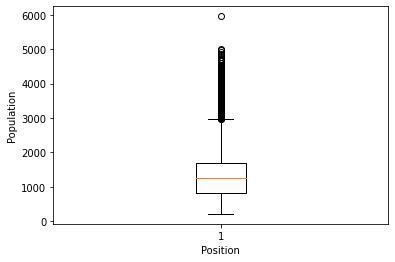

In [ ]:
pop = data['WEEK_POP']

# 상자그림으로 데이터 분포 확인
fig, ax = plt.subplots()

ax.boxplot(pop)
ax.set_xlabel('Position')
ax.set_ylabel('Population')

plt.show()

In [ ]:
# 기술통계량 확인
pop.describe()

count    4171.000000
mean     1413.754805
std       871.304926
min       211.750000
25%       825.354167
50%      1257.500000
75%      1687.208333
max      5955.000000
Name: WEEK_POP, dtype: float64

In [ ]:
# 이상치의 기준을 탐색(iqr) 
q1 = pop.quantile(0.25)
q3 = pop.quantile(0.75)
iqr = q3-q1
iqr

861.8541666666665

In [ ]:
# 이상치의 기준 탐색
out_standard = q3+1.5*iqr
out_standard

2979.989583333333

In [ ]:
# 이상치 개수
outlier = data[data['WEEK_POP']>=out_standard]
outlier

,LONGITUDE,LATITUDE,KATECH_X,KATECH_Y,WEEK_POP
9,127.029228,37.526508,314390,547587,3538.166667
14,127.031203,37.527803,314566,547729,3635.541667
61,127.030639,37.525915,314514,547520,3749.458333
128,127.028909,37.527568,314363,547705,3126.458333
149,127.030066,37.527334,314465,547678,3680.958333
...,...,...,...,...,...
4113,127.039365,37.528266,315288,547773,3482.291667
4134,127.030575,37.526483,314509,547583,4319.541667
4143,127.029332,37.525526,314398,547478,3509.041667
4144,127.031511,37.527562,314593,547702,3463.041667


---

## * 참고자료

강 과장은 “휴지통을 운영하고 있는 지자체 사례의 경우 휴지통 1개당 50-60만원의 설치비용이 필요하다. 여기에 휴지통 1개 연간 관리비로 400-500만원이 들기 때문에 현실적으로 어려운 면이 있다”고 설명했다.

서울시가 올해 예산 8000만원을 투입해 시내 가로 쓰레기통 총 657대를 확충하겠다고 밝혔다.

서울시는 지난 2013년 '가로휴지통 증설·관리개선 계획'을 세우고 자치구에 해마다 가로 쓰레기통 설치비용 일부를 지원해 왔다. 지난해에는 가로 쓰레기통이 6940대로 증가했다. 올해 657대가 설치되면 총 7597대로 늘어난다.

출처 : 그린포스트코리아(http://www.greenpostkorea.co.kr)


- 2017년에는 서울시 370개 추가 설치, 즉 점점 늘어나는 추세 2023년에 서울시 전체에 약 800개를 추가 설치한다고 하면, 426개의 동이 있다는 점을 고려해 압구정동에는 10개 미만의 쓰레기통을 설치하는 것이 바람직하다고 결론 지음.

---

In [ ]:
bin = pd.read_csv("/content/drive/MyDrive/2021_current_bin.csv")
bin

,시도명,시군구명,도로명(가로)명,설치위치,설치지점,쓰레기통 종류,관리기관명,관리기관전화번호,데이터기준일자
0,서울특별시,강남구,압구정로,청담톡스앤필의원,도로변(횡단보도 포함),일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
1,서울특별시,강남구,압구정로,청담톡스앤필의원,도로변(횡단보도 포함),재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
2,서울특별시,강남구,압구정로,갤러리아(EAST점),도로변(횡단보도 포함),일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
3,서울특별시,강남구,압구정로,갤러리아(EAST점),도로변(횡단보도 포함),재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
4,서울특별시,강남구,압구정로,갤러리아(WEST점),도로변(횡단보도 포함),일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
...,...,...,...,...,...,...,...,...,...
971,서울특별시,강남구,양재대로,삼성병원 견너편,"정류소(버스, 택시 등)",재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
972,서울특별시,강남구,헌릉로길,리엔파크 구립행복요양병원 앞,"정류소(버스, 택시 등)",일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
973,서울특별시,강남구,헌릉로길,리엔파크 구립행복요양병원 앞,"정류소(버스, 택시 등)",재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
974,서울특별시,강남구,역삼로,"휘문중,고등학교","정류소(버스, 택시 등)",일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22


In [ ]:
bin = bin.loc[bin['도로명(가로)명']=='압구정로']
print(len(bin))
bin

58


,시도명,시군구명,도로명(가로)명,설치위치,설치지점,쓰레기통 종류,관리기관명,관리기관전화번호,데이터기준일자
0,서울특별시,강남구,압구정로,청담톡스앤필의원,도로변(횡단보도 포함),일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
1,서울특별시,강남구,압구정로,청담톡스앤필의원,도로변(횡단보도 포함),재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
2,서울특별시,강남구,압구정로,갤러리아(EAST점),도로변(횡단보도 포함),일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
3,서울특별시,강남구,압구정로,갤러리아(EAST점),도로변(횡단보도 포함),재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
4,서울특별시,강남구,압구정로,갤러리아(WEST점),도로변(횡단보도 포함),일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
5,서울특별시,강남구,압구정로,갤러리아(WEST점),도로변(횡단보도 포함),재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
6,서울특별시,강남구,압구정로,갤러리아(생활관),"정류소(버스, 택시 등)",일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
7,서울특별시,강남구,압구정로,갤러리아(생활관),"정류소(버스, 택시 등)",재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
8,서울특별시,강남구,압구정로,한양아파트 35동,도로변(횡단보도 포함),일반쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22
9,서울특별시,강남구,압구정로,한양아파트 35동,도로변(횡단보도 포함),재활용쓰레기,서울특별시 강남구청,02-3423-5973,2021-06-22


- 현재 압구정에 있는 쓰레기통 개수 : 약 50개
- 새로 설치할 쓰레기통 개수 : 추후에 결정

---

# 3. 시각화

In [ ]:
import folium

# 중심 지정
center_lat = data['LATITUDE'].mean()
center_long = data['LONGITUDE'].mean()

m = folium.Map([center_lat, center_long], zoom_start=15)

# outlier : 지도위에 표시
for i in outlier.index:
    out_lat = outlier.loc[i, 'LATITUDE']
    out_long = outlier.loc[i, 'LONGITUDE']
    out_title = outlier.loc[i, 'WEEK_POP']
    
    # 지도에 outlier 시각화
    folium.Marker([out_lat, out_long],  
                  icon=folium.Icon(color='red',icon='star'),
                  tooltip = out_title).add_to(m)
m